In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
import pingouin as pg

## Reading in CSV 
The plan is to read in the raw data CSV as a DF_raw and then filtering said DF_raw by the columns that were eventually selected after removing highly correlated features

In [3]:
starting_directory='/Users/Joseph/Desktop/'
raw_chooser=FileChooser(starting_directory)
display(raw_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [5]:
raw_df_file=raw_chooser.selected
print(raw_df_file)

/Users/Joseph/Desktop/Chris/MergedDARelatedNeurons_df.csv


In [6]:
filtered_scaled_chooser=FileChooser(starting_directory)
display(filtered_scaled_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [7]:
filtered_df_file=filtered_scaled_chooser.selected
print(filtered_df_file)

/Users/Joseph/Desktop/Chris/MergedDARelatedNeurons_scaled_CorrelationFiltered_df.csv


In [10]:
raw_df = pd.read_csv(raw_df_file)
raw_df

,Gene,length,midline,width,morphwidth,area,speed_OffFood,angularspeed_OffFood,bias_OffFood,curve_OffFood,...,SAB_exp_level,SIA_exp_level,SMD_exp_level,URB_exp_level,VA_exp_level,VA12_exp_level,VB_exp_level,VB01_exp_level,VB02_exp_level,VD_DD_exp_level
0,C29E4.10,-16.786142,-25.452567,3.072019,29.910115,23.093364,-35.669840,-6.386035,-11.928263,-3.321696,...,0.000,0.000,0.000,0.000,0.000,0.000,2.071,0.000,0.000,0.000
1,F53B2.5,-51.029134,-78.474989,-14.817783,21.450837,-18.114356,-48.654369,-0.702849,-13.606677,2.601134,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,R07G3.8,-10.779684,-51.494920,-42.339794,-2.451845,-8.991483,-42.644460,-32.268041,3.996838,-64.246560,...,14.654,32.719,21.929,4.877,63.889,76.159,36.215,72.807,25.913,14.082
3,acr-12,-65.795785,-49.604534,46.585798,52.972338,11.806199,9.369826,30.589735,-12.220690,3.956345,...,259.060,63.082,162.769,11.464,268.168,337.037,245.429,147.990,198.298,373.963
4,acr-3,-37.043382,-22.706991,32.368522,31.915839,11.142785,-12.608866,14.106675,-4.720580,6.485939,...,0.000,0.483,4.665,0.000,0.985,0.000,1.754,1.292,1.319,0.504
5,acr-6,3.747528,-28.960398,-26.635481,44.051943,48.420136,-66.163439,-37.275543,12.791614,-45.046132,...,0.000,0.356,0.000,0.000,0.000,0.000,3.666,0.528,0.269,0.000
6,acr-8,-10.311611,15.461441,27.732318,-7.486829,-13.008010,-46.093920,-11.794497,-0.331928,30.332552,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,bas-1,-68.297877,-90.660760,-16.143131,-100.167942,-168.126790,-20.091231,-0.266234,-7.608348,9.538307,...,0.000,0.000,0.000,148.165,0.000,0.000,0.000,0.779,0.000,0.835
8,cat-1,-56.228953,-85.272319,-24.498888,-78.507180,-145.711983,-77.711788,-27.368824,-16.947782,-40.790024,...,0.000,0.513,0.000,0.000,0.000,0.000,0.000,0.917,0.089,2.675
9,cat-2,-43.222991,-50.802584,7.603572,11.338681,-23.401282,-2.573917,7.818758,-9.370069,-13.025526,...,0.000,0.375,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.106


In [11]:
filtered_df = pd.read_csv(filtered_df_file)
filtered_df

,Gene,length,width,morphwidth,speed_OffFood,angularspeed_OffFood,bias_OffFood,speed_OnFood,angularspeed_OnFood,kink_OnFood,...,PVN_exp_level,PVR_exp_level,PVW_exp_level,RIC_exp_level,RID_exp_level,RIM_exp_level,RIP_exp_level,RIS_exp_level,RMH_exp_level,URB_exp_level
0,C29E4.10,0.812110,0.717367,0.896797,0.769191,0.560482,0.477828,0.388442,0.429696,0.428609,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025682,0.000000
1,F53B2.5,0.666014,0.601169,0.858943,0.702650,0.628036,0.442374,0.429218,0.391152,0.261324,...,0.000000,0.000000,0.000000,0.000321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,R07G3.8,0.837737,0.422407,0.751979,0.733449,0.252831,0.814223,0.254600,0.196738,0.252755,...,0.000000,0.007032,0.155152,0.024525,0.023952,0.022467,0.066466,0.000000,0.681533,0.007226
3,acr-12,0.603012,1.000000,1.000000,1.000000,1.000000,0.471651,0.516010,0.787810,0.963434,...,0.083519,0.482441,0.527509,0.033610,0.370951,0.054337,0.197829,0.076991,0.406732,0.016985
4,acr-3,0.725683,0.907655,0.905773,0.887368,0.804071,0.630080,0.737761,0.761737,0.685288,...,0.000000,0.000000,0.026020,0.232589,0.000000,1.000000,0.867073,0.000000,0.000000,0.000000
5,acr-6,0.899717,0.524410,0.960082,0.612924,0.193308,1.000000,0.485673,0.204960,0.000000,...,0.000000,0.010973,0.830647,0.004008,0.000000,0.373897,0.000000,0.000000,0.000000,0.000000
6,acr-8,0.839734,0.877542,0.729448,0.715772,0.496193,0.722784,0.618806,0.640739,0.731833,...,0.000000,0.000000,0.000000,0.136136,0.000000,0.000000,0.000000,0.000000,0.012369,0.000000
7,bas-1,0.592337,0.592560,0.314703,0.849024,0.633226,0.569080,0.826511,0.797704,0.453314,...,0.000000,0.000000,0.054027,0.000396,0.020338,0.000000,0.000000,0.000000,0.000000,0.219517
8,cat-1,0.643829,0.538288,0.411634,0.553743,0.311066,0.371798,0.301649,0.344477,0.499626,...,0.000000,0.020339,0.003178,0.352858,0.000000,0.492346,0.000000,0.000000,0.000000,0.000000
9,cat-2,0.699318,0.746801,0.813691,0.938793,0.729329,0.531866,1.000000,1.000000,0.442655,...,0.000000,0.000000,0.000000,0.000396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
filtered_df.columns

Index(['Gene', 'length', 'width', 'morphwidth', 'speed_OffFood',
       'angularspeed_OffFood', 'bias_OffFood', 'speed_OnFood',
       'angularspeed_OnFood', 'kink_OnFood', 'speed', 'angularspeed', 'curve',
       'kink', 'ADE_exp_level', 'CEP_exp_level', 'ADA_exp_level',
       'ADF_exp_level', 'AIA_exp_level', 'AIB_exp_level', 'AIZ_exp_level',
       'ALA_exp_level', 'ALM_exp_level', 'AS_exp_level', 'ASH_exp_level',
       'AVA_exp_level', 'AVM_exp_level', 'BDU_exp_level', 'DA9_exp_level',
       'FLP_exp_level', 'I2_exp_level', 'I3_exp_level', 'IL1_exp_level',
       'OLL_exp_level', 'OLQ_exp_level', 'PDB_exp_level', 'PHA_exp_level',
       'PVM_exp_level', 'PVN_exp_level', 'PVR_exp_level', 'PVW_exp_level',
       'RIC_exp_level', 'RID_exp_level', 'RIM_exp_level', 'RIP_exp_level',
       'RIS_exp_level', 'RMH_exp_level', 'URB_exp_level'],
      dtype='object')

In [14]:
raw_filtered = raw_df[filtered_df.columns]
raw_filtered

,Gene,length,width,morphwidth,speed_OffFood,angularspeed_OffFood,bias_OffFood,speed_OnFood,angularspeed_OnFood,kink_OnFood,...,PVN_exp_level,PVR_exp_level,PVW_exp_level,RIC_exp_level,RID_exp_level,RIM_exp_level,RIP_exp_level,RIS_exp_level,RMH_exp_level,URB_exp_level
0,C29E4.10,-16.786142,3.072019,29.910115,-35.669840,-6.386035,-11.928263,-57.058032,-12.269337,5.802926,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.437,0.000
1,F53B2.5,-51.029134,-14.817783,21.450837,-48.654369,-0.702849,-13.606677,-48.164731,-16.583580,-5.847698,...,0.000,0.000,0.000,0.286,0.000,0.000,0.000,0.000,0.000,0.000
2,R07G3.8,-10.779684,-42.339794,-2.451845,-42.644460,-32.268041,3.996838,-86.249053,-38.344296,-6.444493,...,0.000,2.773,63.270,21.823,5.919,43.877,35.613,0.000,117.745,4.877
3,acr-12,-65.795785,46.585798,52.972338,9.369826,30.589735,-12.220690,-29.235117,27.814248,43.051062,...,114.757,190.237,215.115,29.907,91.669,106.116,105.999,49.833,70.269,11.464
4,acr-3,-37.043382,32.368522,31.915839,-12.608866,14.106675,-4.720580,19.128954,24.895842,23.679468,...,0.000,0.000,10.611,206.964,0.000,1952.923,464.587,0.000,0.000,0.000
5,acr-6,3.747528,-26.635481,44.051943,-66.163439,-37.275543,12.791614,-35.851747,-37.423979,-24.047690,...,0.000,4.327,338.733,3.566,0.000,730.193,0.000,0.000,0.000,0.000
6,acr-8,-10.311611,27.732318,-7.486829,-46.093920,-11.794497,-0.331928,-6.815147,11.352614,26.921067,...,0.000,0.000,0.000,121.138,0.000,0.000,0.000,0.000,2.137,0.000
7,bas-1,-68.297877,-16.143131,-100.167942,-20.091231,-0.266234,-7.608348,38.485659,28.921645,7.523537,...,0.000,0.000,22.032,0.352,5.026,0.000,0.000,0.000,0.000,148.165
8,cat-1,-56.228953,-24.498888,-78.507180,-77.711788,-27.368824,-16.947782,-75.987754,-21.807880,10.748928,...,0.000,8.020,1.296,313.983,0.000,961.514,0.000,0.000,0.000,0.000
9,cat-2,-43.222991,7.603572,11.338681,-2.573917,7.818758,-9.370069,76.323783,51.564552,6.781168,...,0.000,0.000,0.000,0.352,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
KMeans_DF = raw_filtered.copy()
KMeans_genes = KMeans_DF.pop("Gene")
# KMeans_genes

## Scaling....

I had originally skipped past this step and jumped straight into the steps that come after, but realized that the completely inbalanced dataset is hindering the computational work (found out when umap is struggling with the original dataset). In this case I'm going to be using StandardScaler here...

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
KMeans_DF_scaled = scaler.fit_transform(KMeans_DF)
KMeans_DF_scaled

array([[ 0.87284104,  0.88541399,  1.33768337, ..., -0.28981906,
        -0.47088908, -0.41974169],
       [ 0.18012778,  0.35449599,  1.17271544, ..., -0.28981906,
        -0.58603578, -0.41974169],
       [ 0.99434775, -0.46227833,  0.70657918, ..., -0.28981906,
         2.46962072, -0.37201968],
       ...,
       [-1.40181224,  1.45909199,  1.61459219, ..., -0.21174821,
         0.35037132,  0.05835911],
       [-1.51215259, -0.54662621,  0.32826103, ...,  1.21917551,
         0.83335423,  0.61850812],
       [-0.69919819, -1.18410949, -1.4513402 , ..., -0.28981906,
        -0.17652149, -0.09708725]])

## KMeans Elbow Method

Using the elbow method to optimize for how many clusters for KMeans. From the elbow method it seems like somewhere between 6-8 clusters would be good, but after performing the clustering for each of these n_clusters, the clusters don't seem to yield balanced clusters (maybe 2-3 clusters with semi-balanced numbers, but the rest of the clusters only have 1 gene... not good...)

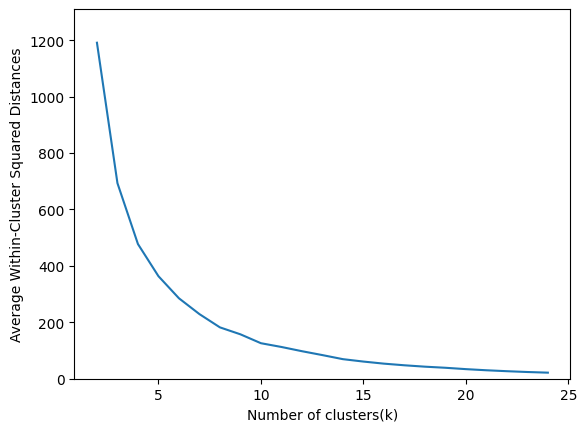

In [43]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(2,25):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0).fit(KMeans_DF_scaled)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2,25), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)

In [44]:
kmeans = KMeans(n_clusters=8, n_init=10000,random_state=0).fit(KMeans_DF_scaled)

In [45]:
from collections import Counter
kmeans_counter=Counter(kmeans.labels_)
kmeans_counter

Counter({1: 17, 2: 17, 4: 15, 0: 3, 3: 2, 6: 2, 5: 1, 7: 1})

## KMeans Clustering Silhouette method
Optimizing for number of clusters for KMeans through the silhouette method. The results don't seem to reveal any optimal settings. Therefore as I move on from here I am thinking of exploring other clustering methods...

For n_clusters = 2 The average silhouette_score is : 0.20974931769426133
For n_clusters = 3 The average silhouette_score is : 0.17282845153303406
For n_clusters = 4 The average silhouette_score is : 0.1717988685467206
For n_clusters = 5 The average silhouette_score is : 0.18123498005945182
For n_clusters = 6 The average silhouette_score is : 0.18854491432635503
For n_clusters = 7 The average silhouette_score is : 0.1872764449726633
For n_clusters = 8 The average silhouette_score is : 0.05958921816818465
For n_clusters = 9 The average silhouette_score is : 0.10069456199371099
For n_clusters = 10 The average silhouette_score is : 0.10302629158906375
For n_clusters = 11 The average silhouette_score is : 0.11109322165268572
For n_clusters = 12 The average silhouette_score is : 0.10929358456639995
For n_clusters = 13 The average silhouette_score is : 0.08512708147141355
For n_clusters = 14 The average silhouette_score is : 0.06935264894084592
For n_clusters = 15 The average silhouette_score

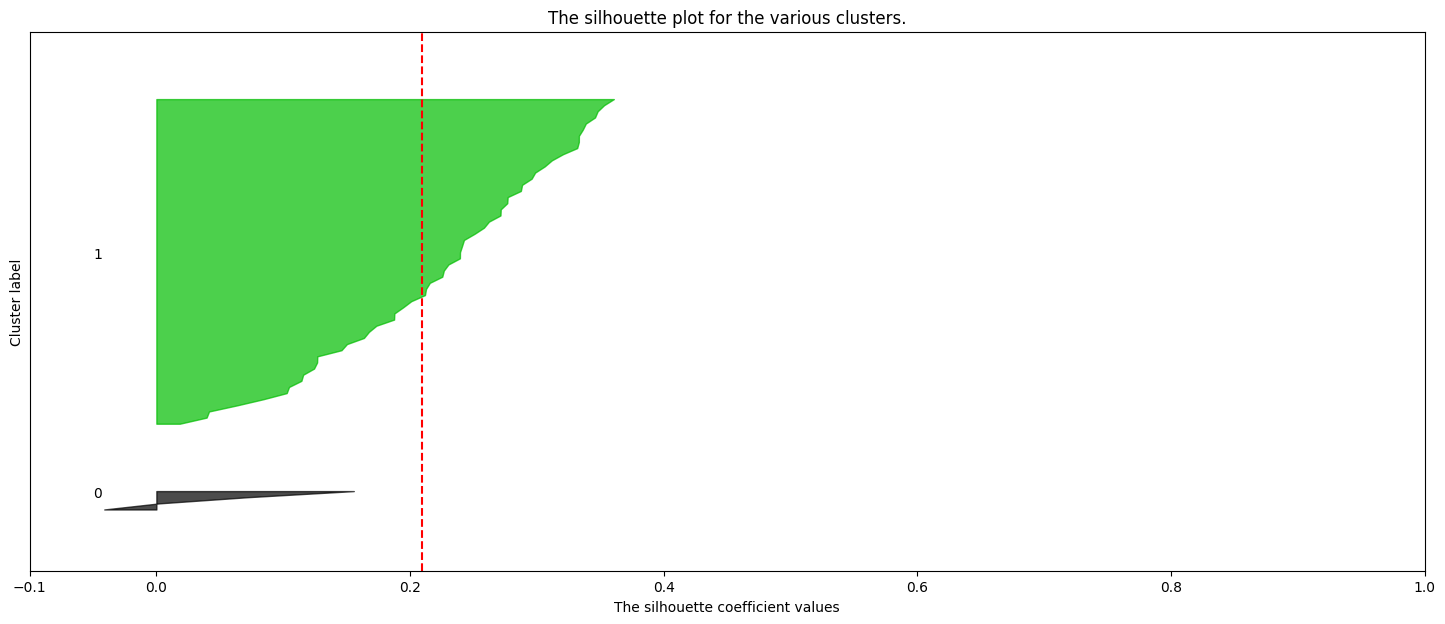

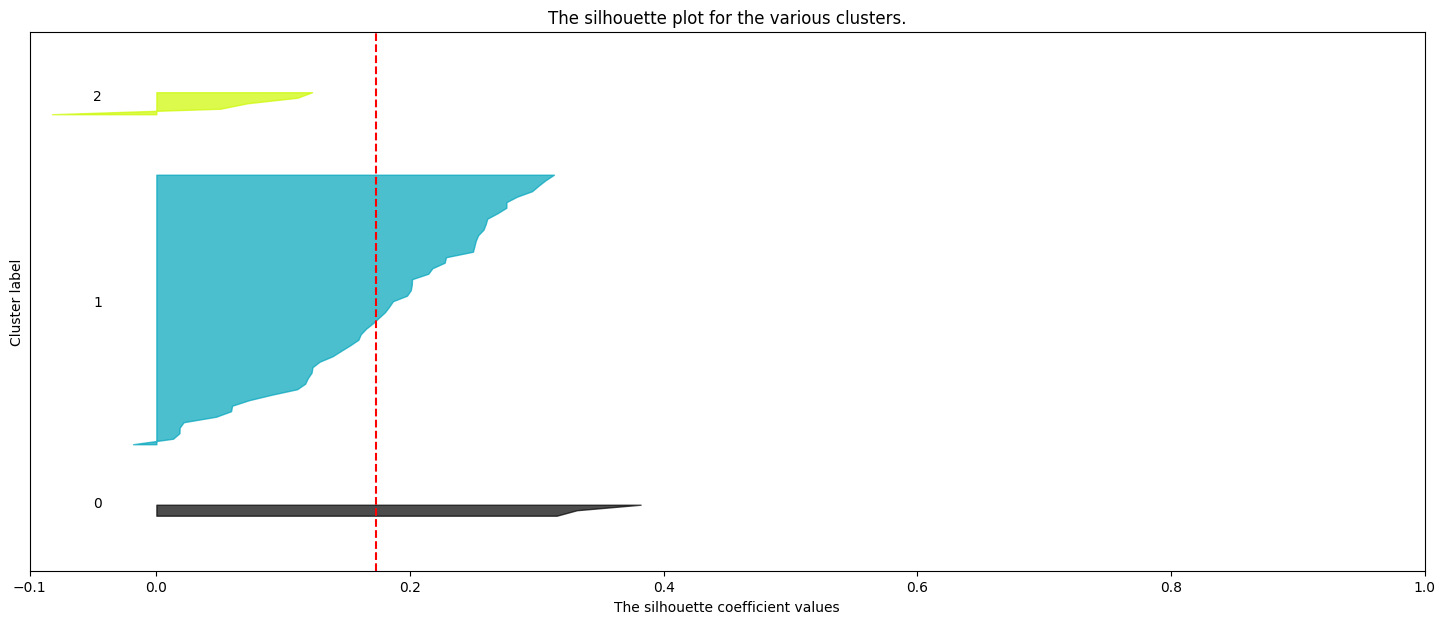

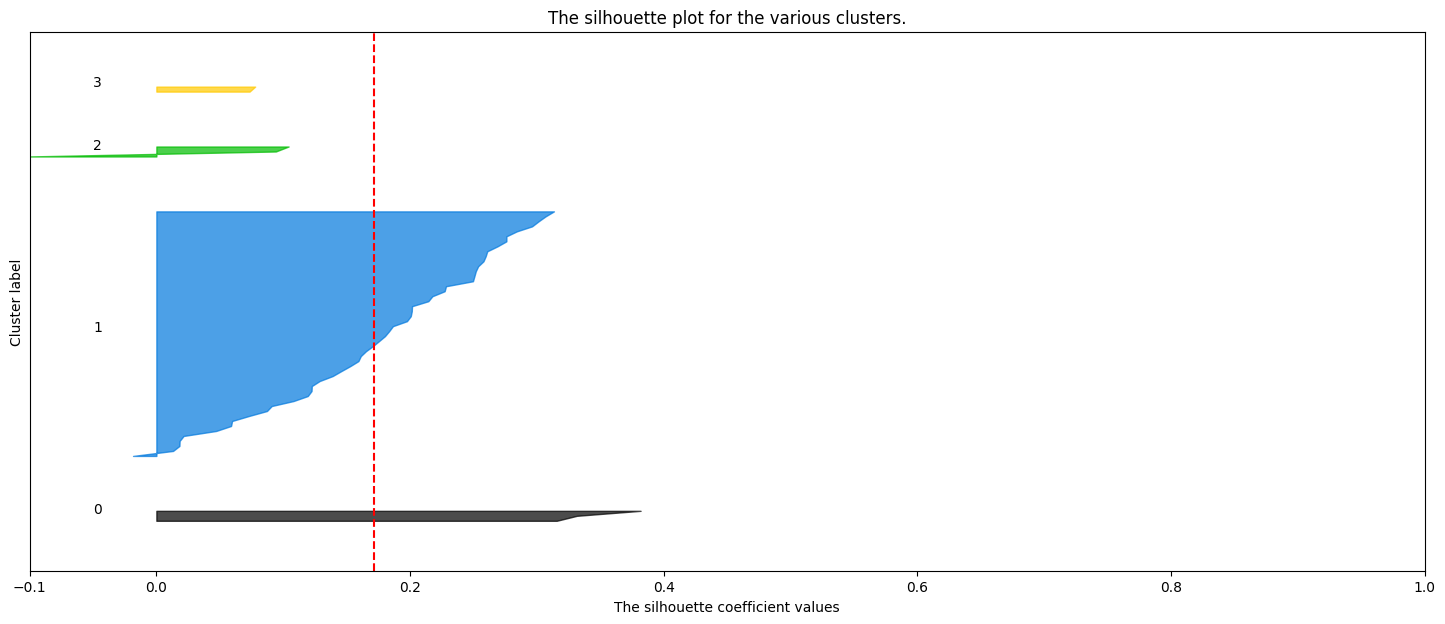

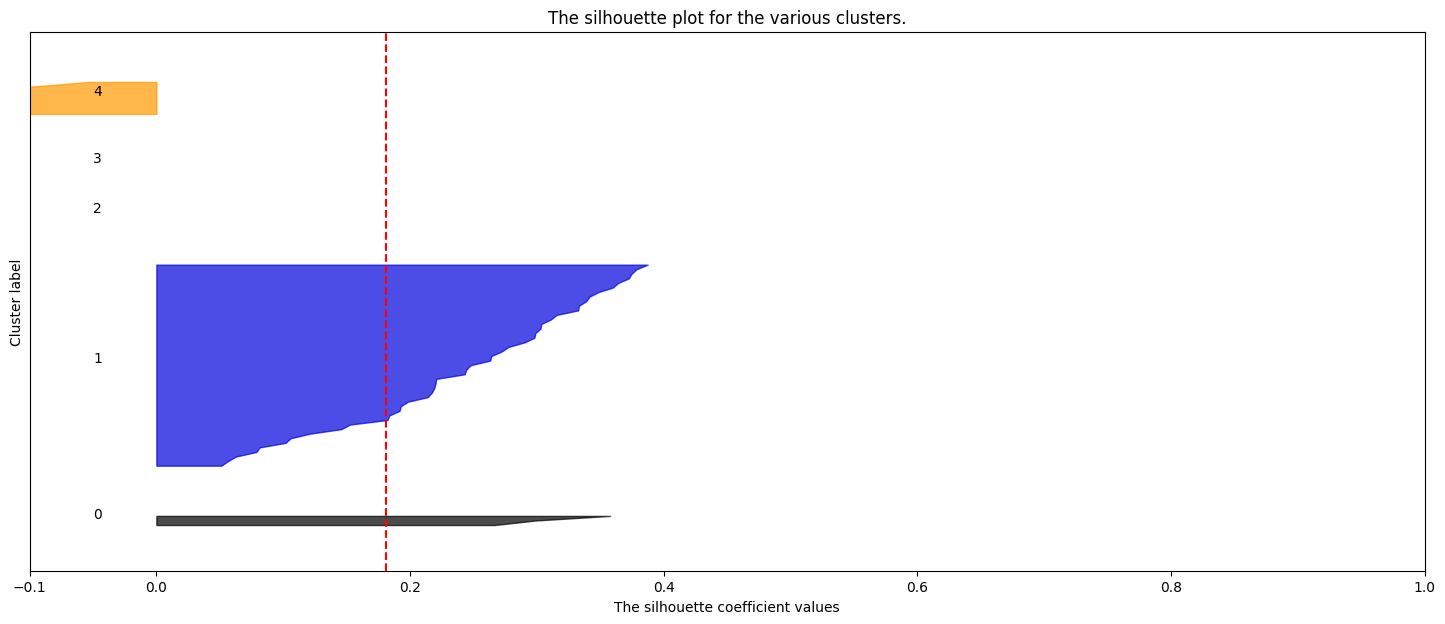

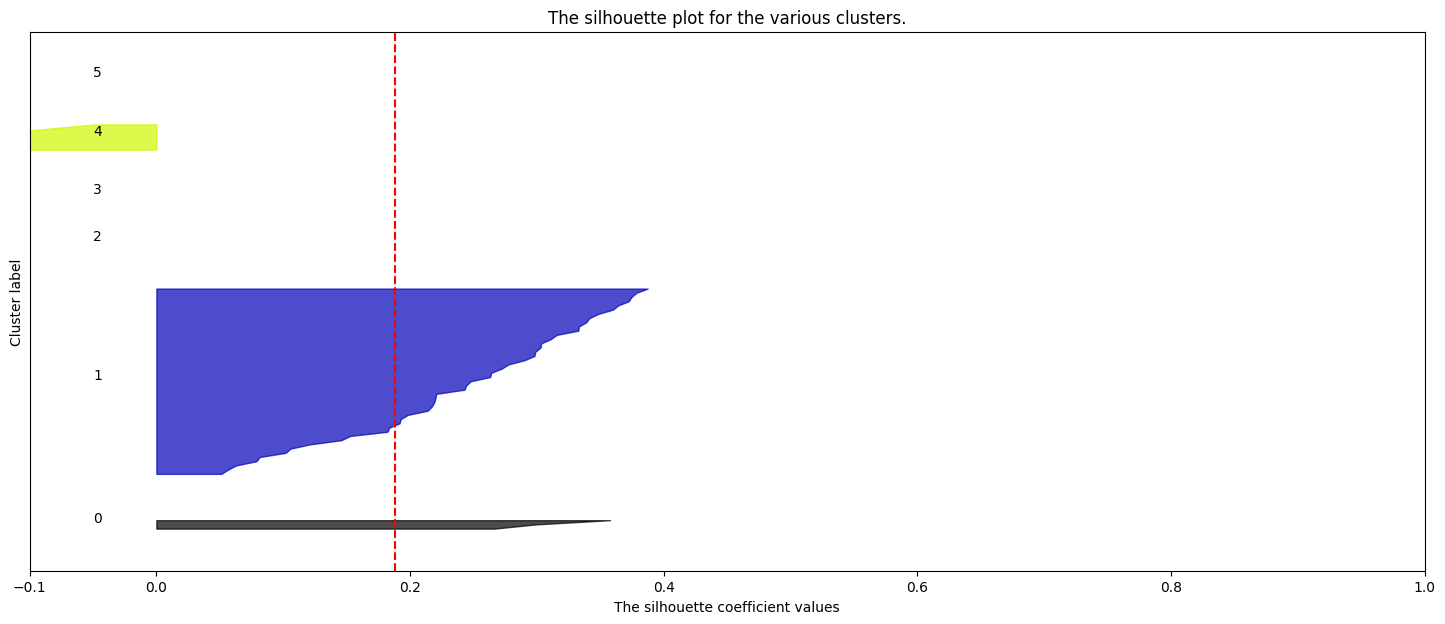

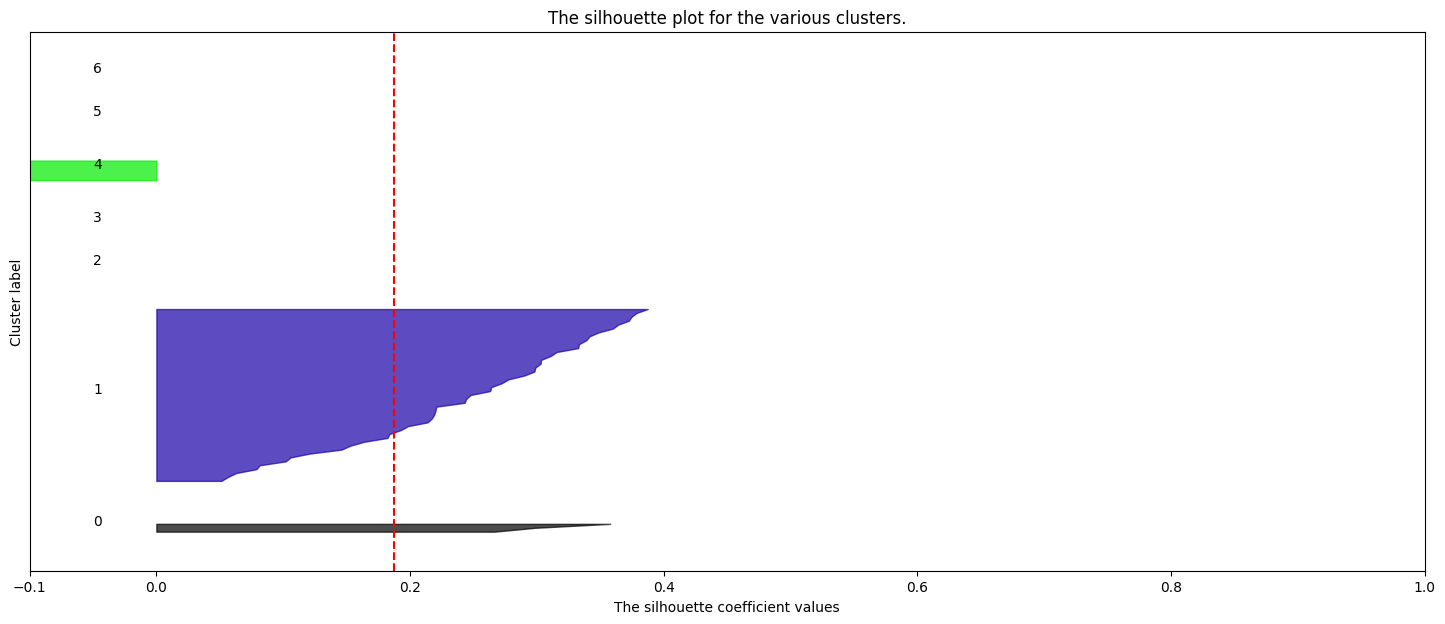

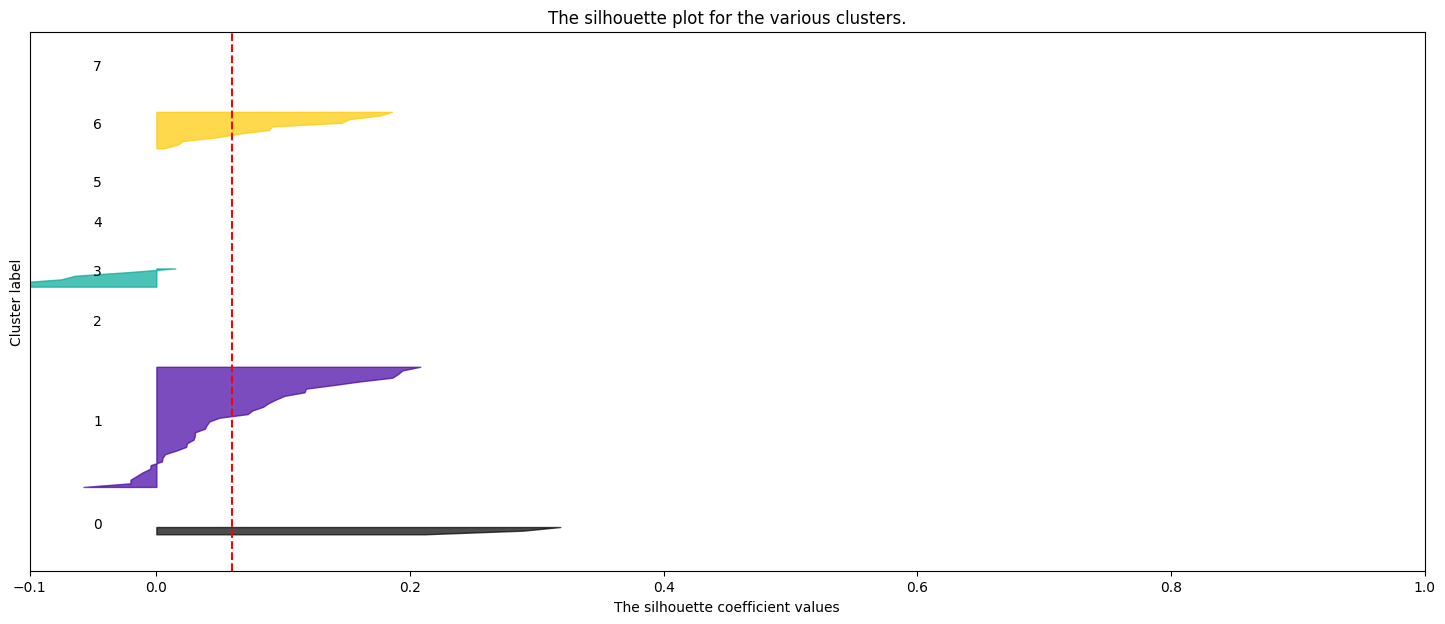

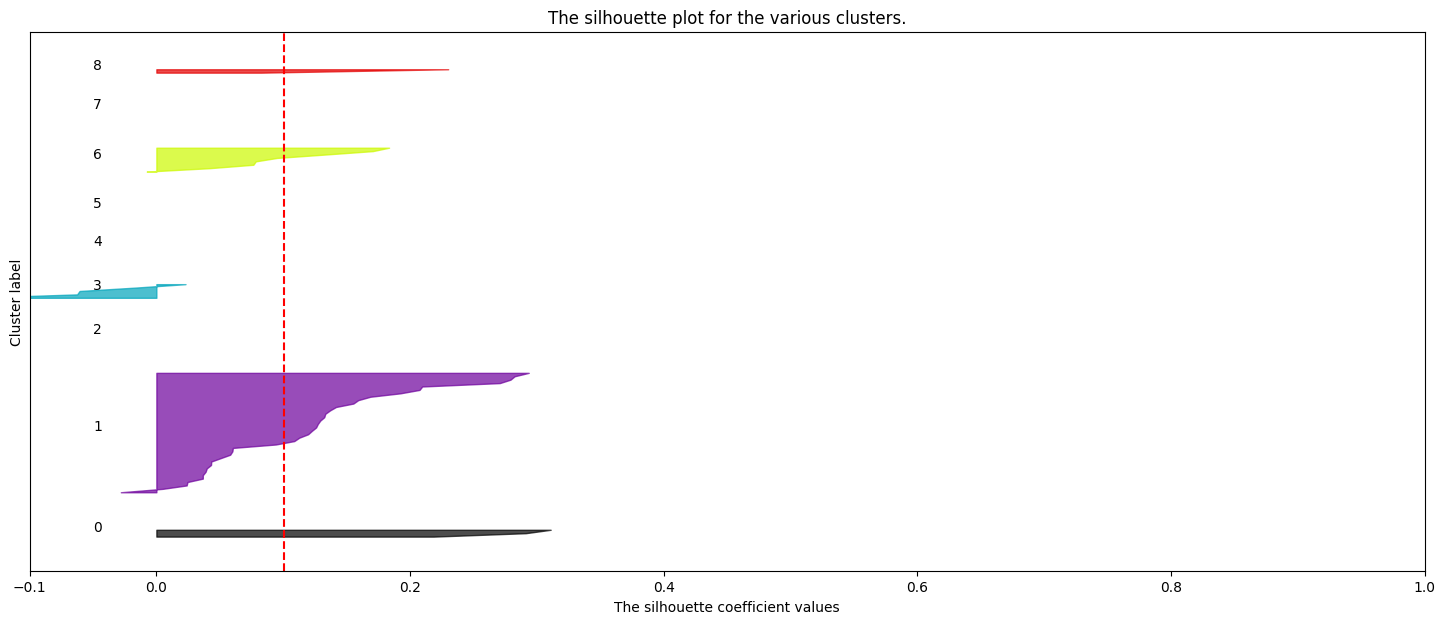

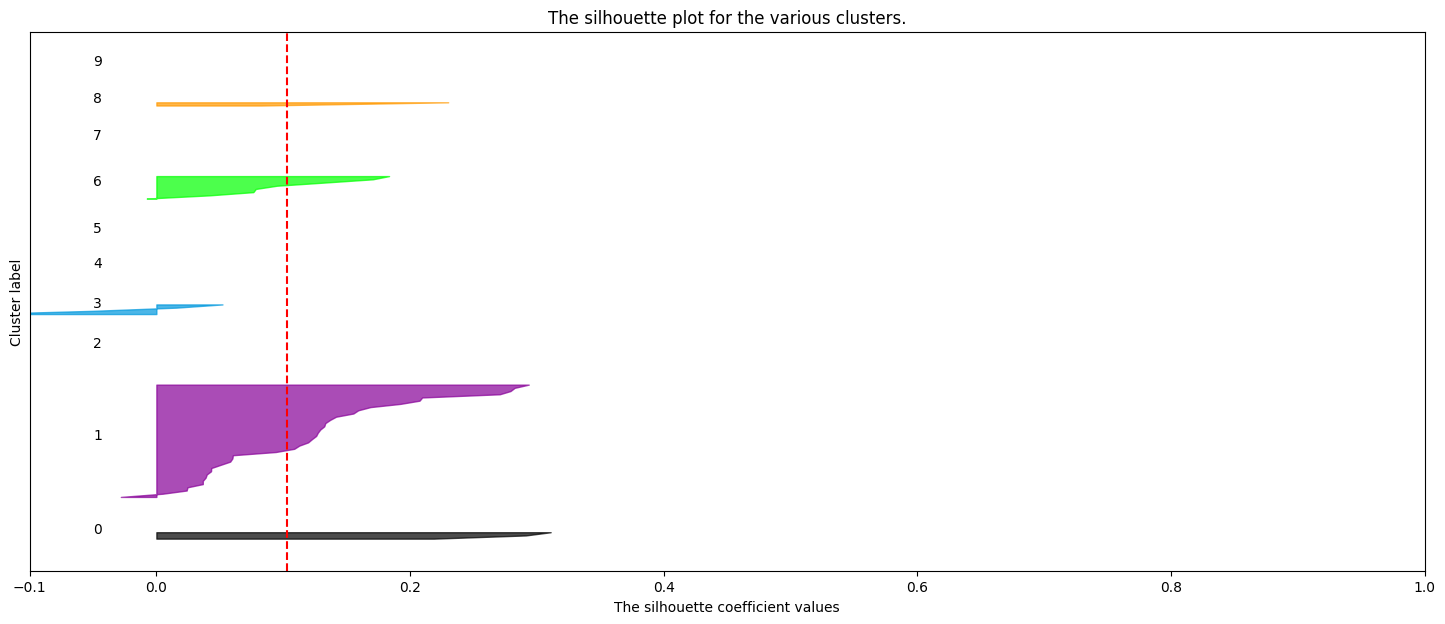

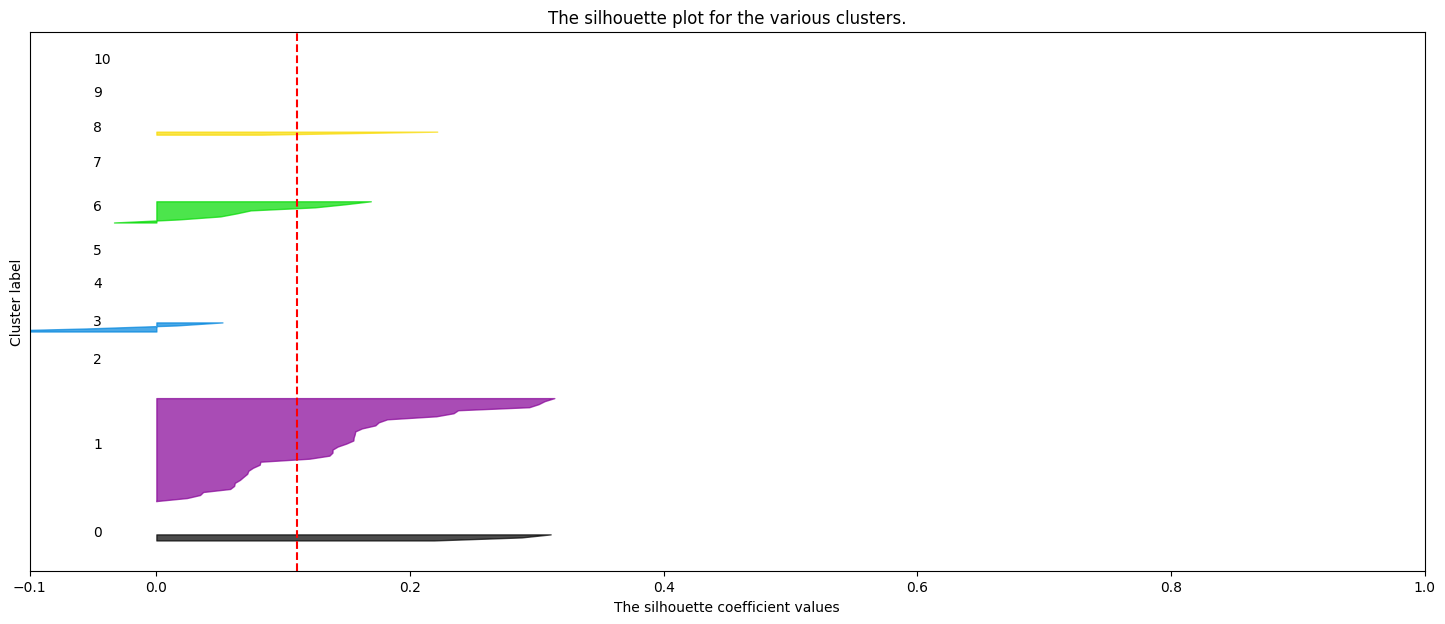

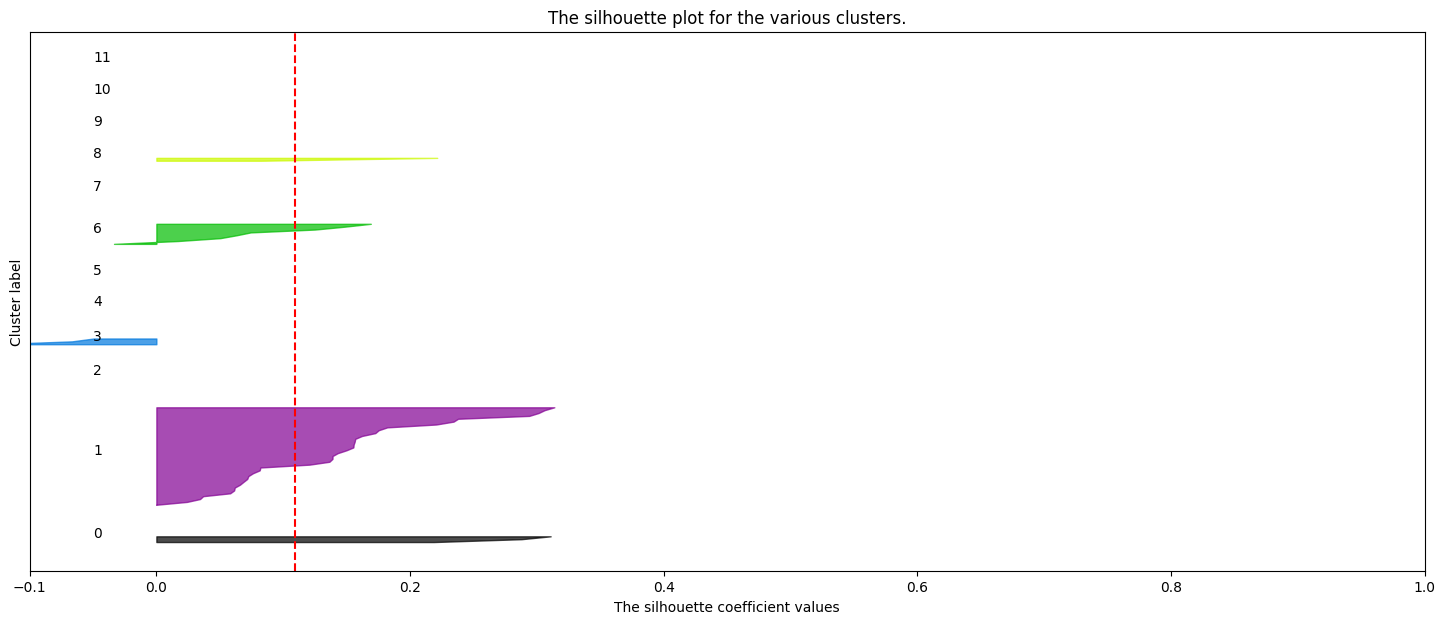

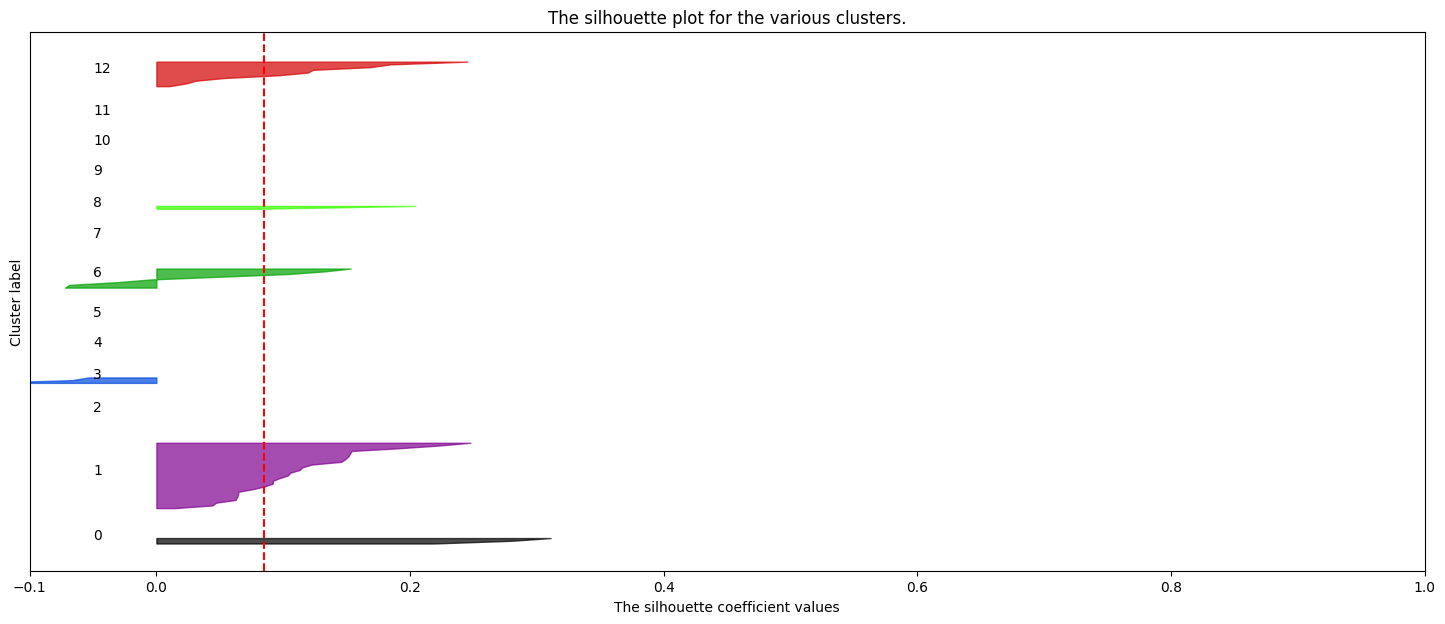

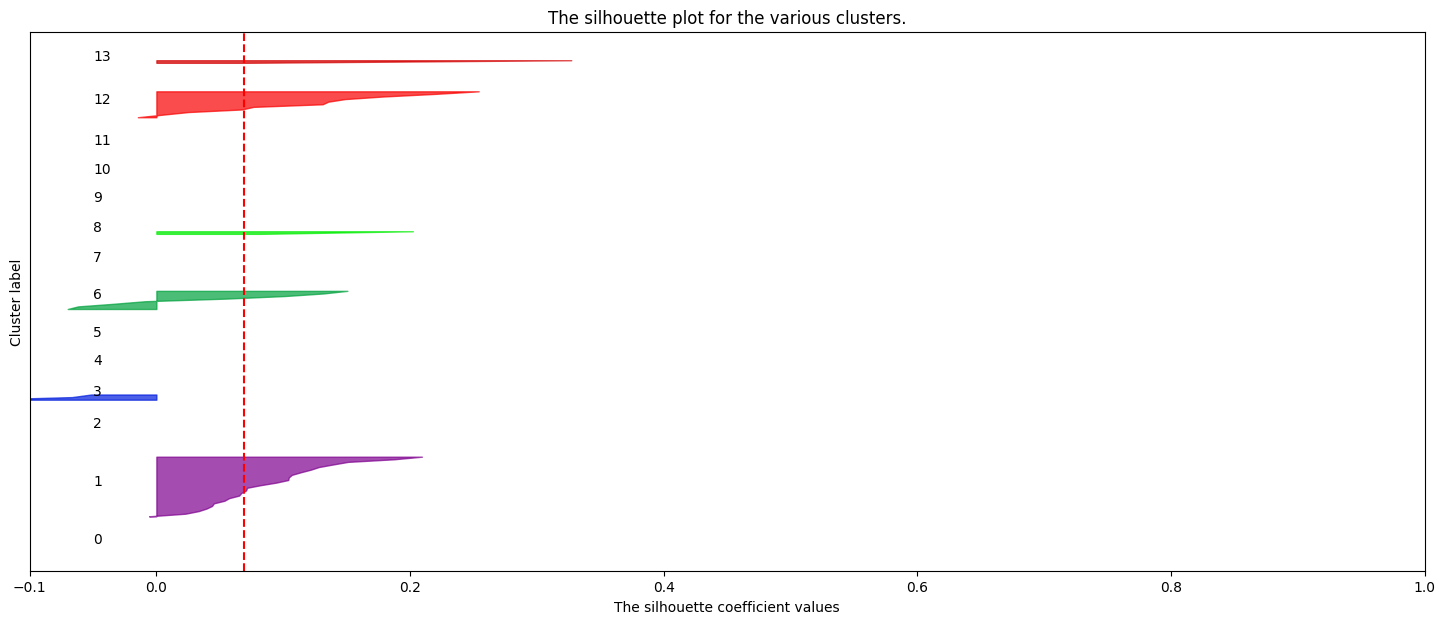

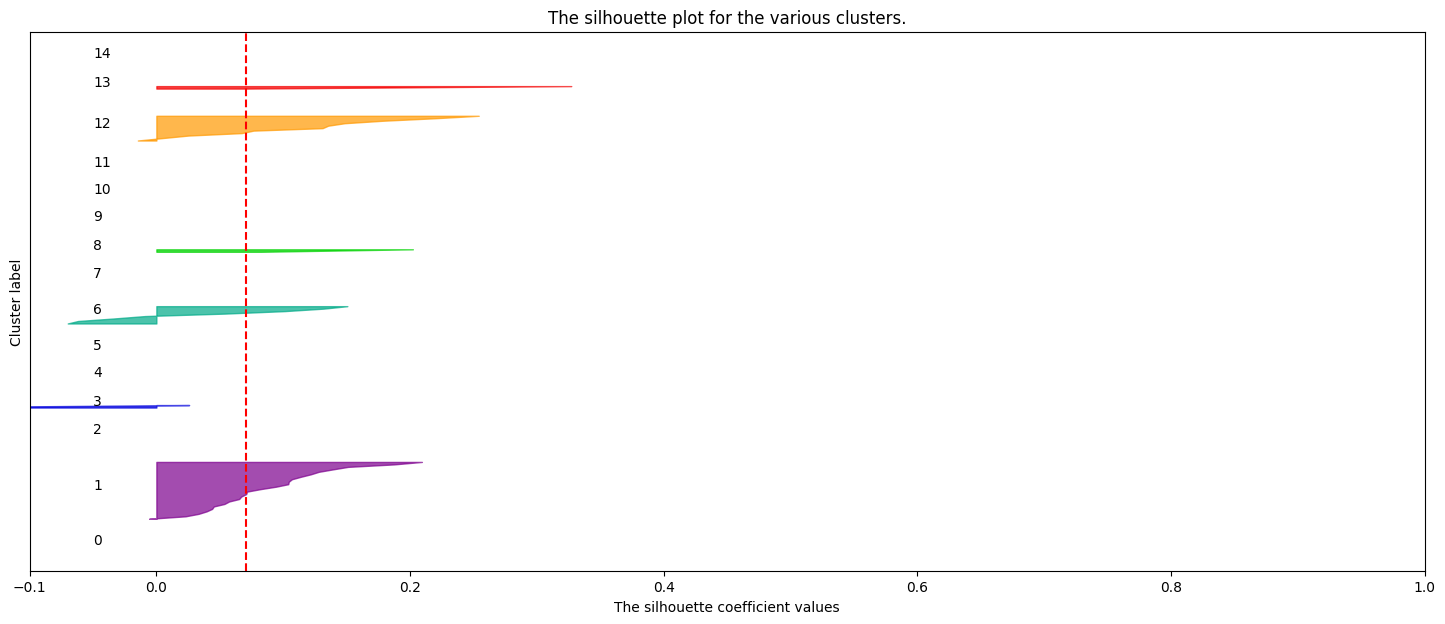

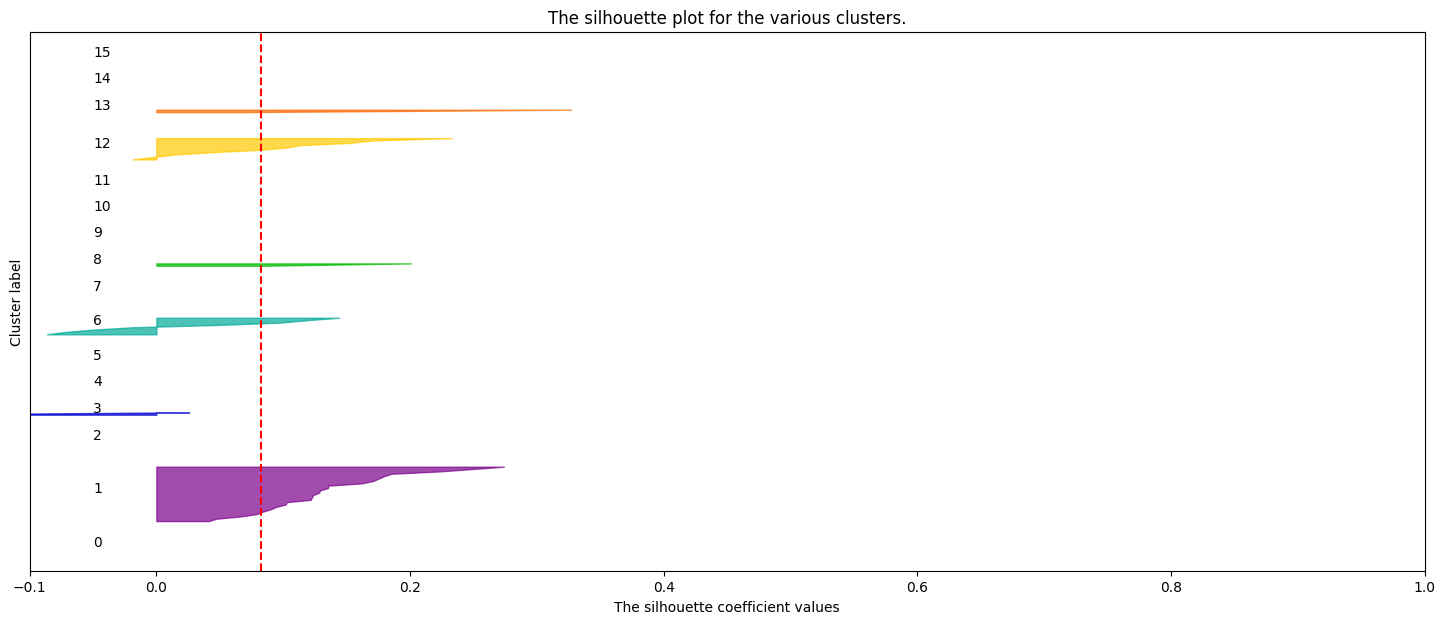

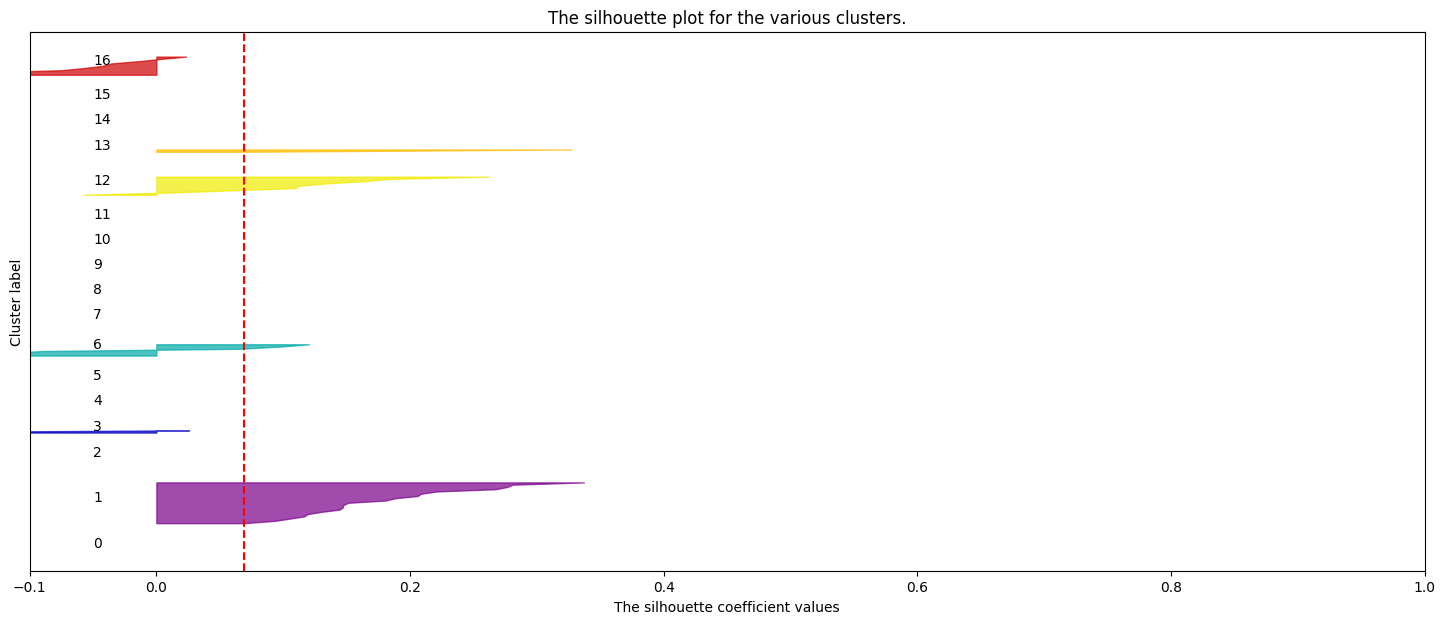

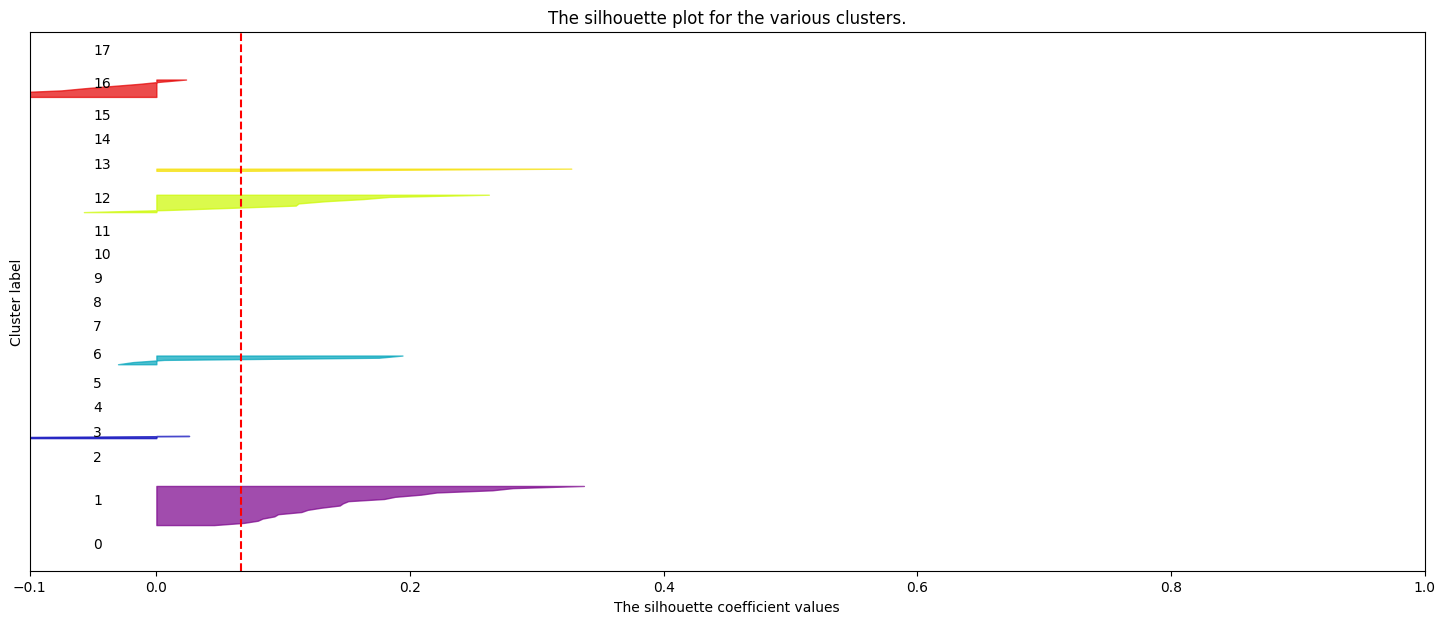

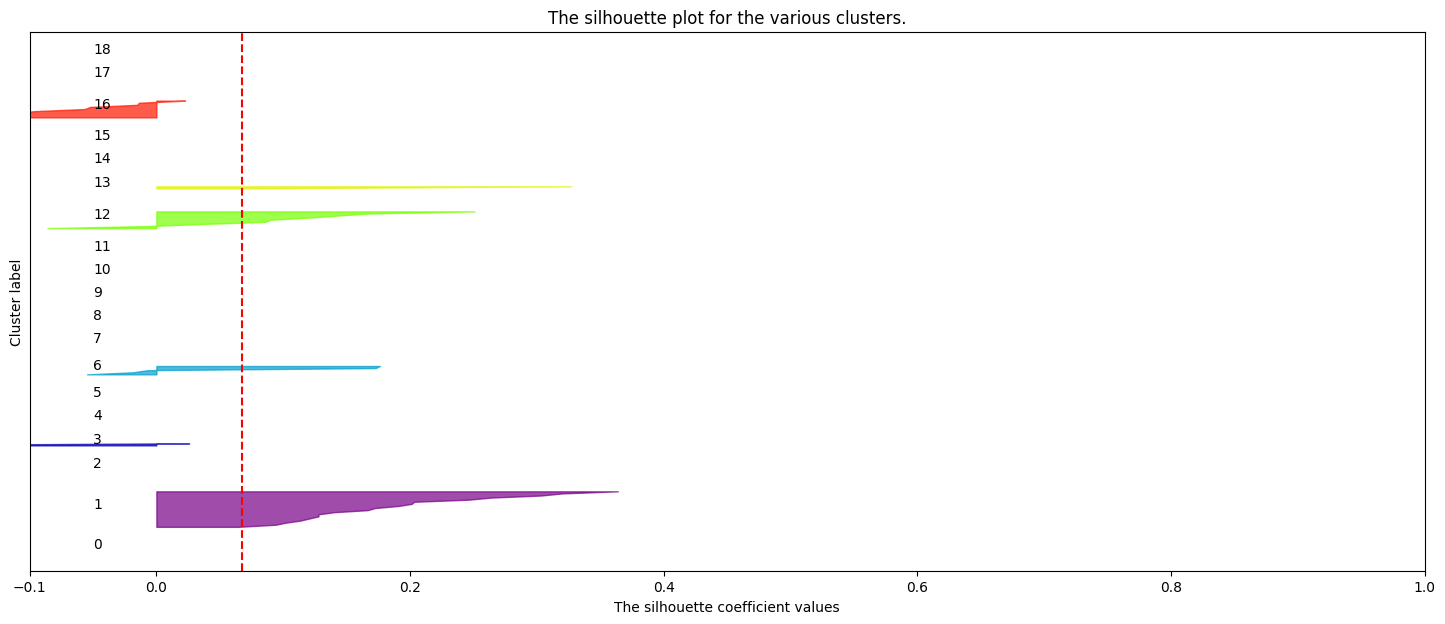

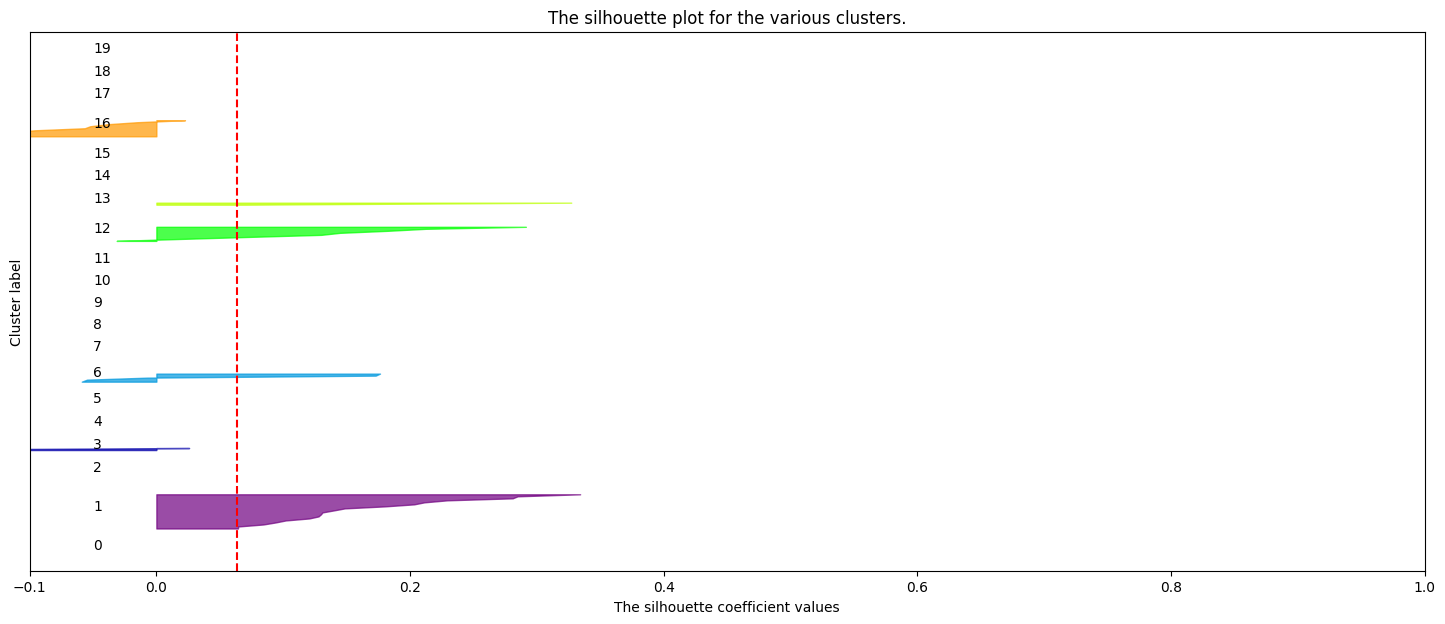

In [157]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(KMeans_DF_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    cluster_labels = clusterer.fit_predict(KMeans_DF_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(KMeans_DF_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(KMeans_DF_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

## MeanShift Clustering

MeanShift Clustering didn't really generate meaninful clusters.... 

In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True,max_iter=1000,cluster_all=True)
ms.fit(KMeans_DF_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


In [48]:
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
from collections import Counter
MeanShift_counter=Counter(ms.labels_)
MeanShift_counter

Counter({0: 54, 2: 1, 3: 1, 4: 1, 1: 1})

## PCA

Plotting umap on cluster labels generated from kmeans (and MeanShift) clustering didn't really yield anything meaningful.... Decided not to put too much more effort into trying to figure this out.

In [50]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(KMeans_DF_scaled)

In [51]:
df_PCA = pd.DataFrame({'PCA_x':reduced_data[:,0],'PCA_y':reduced_data[:,1]})

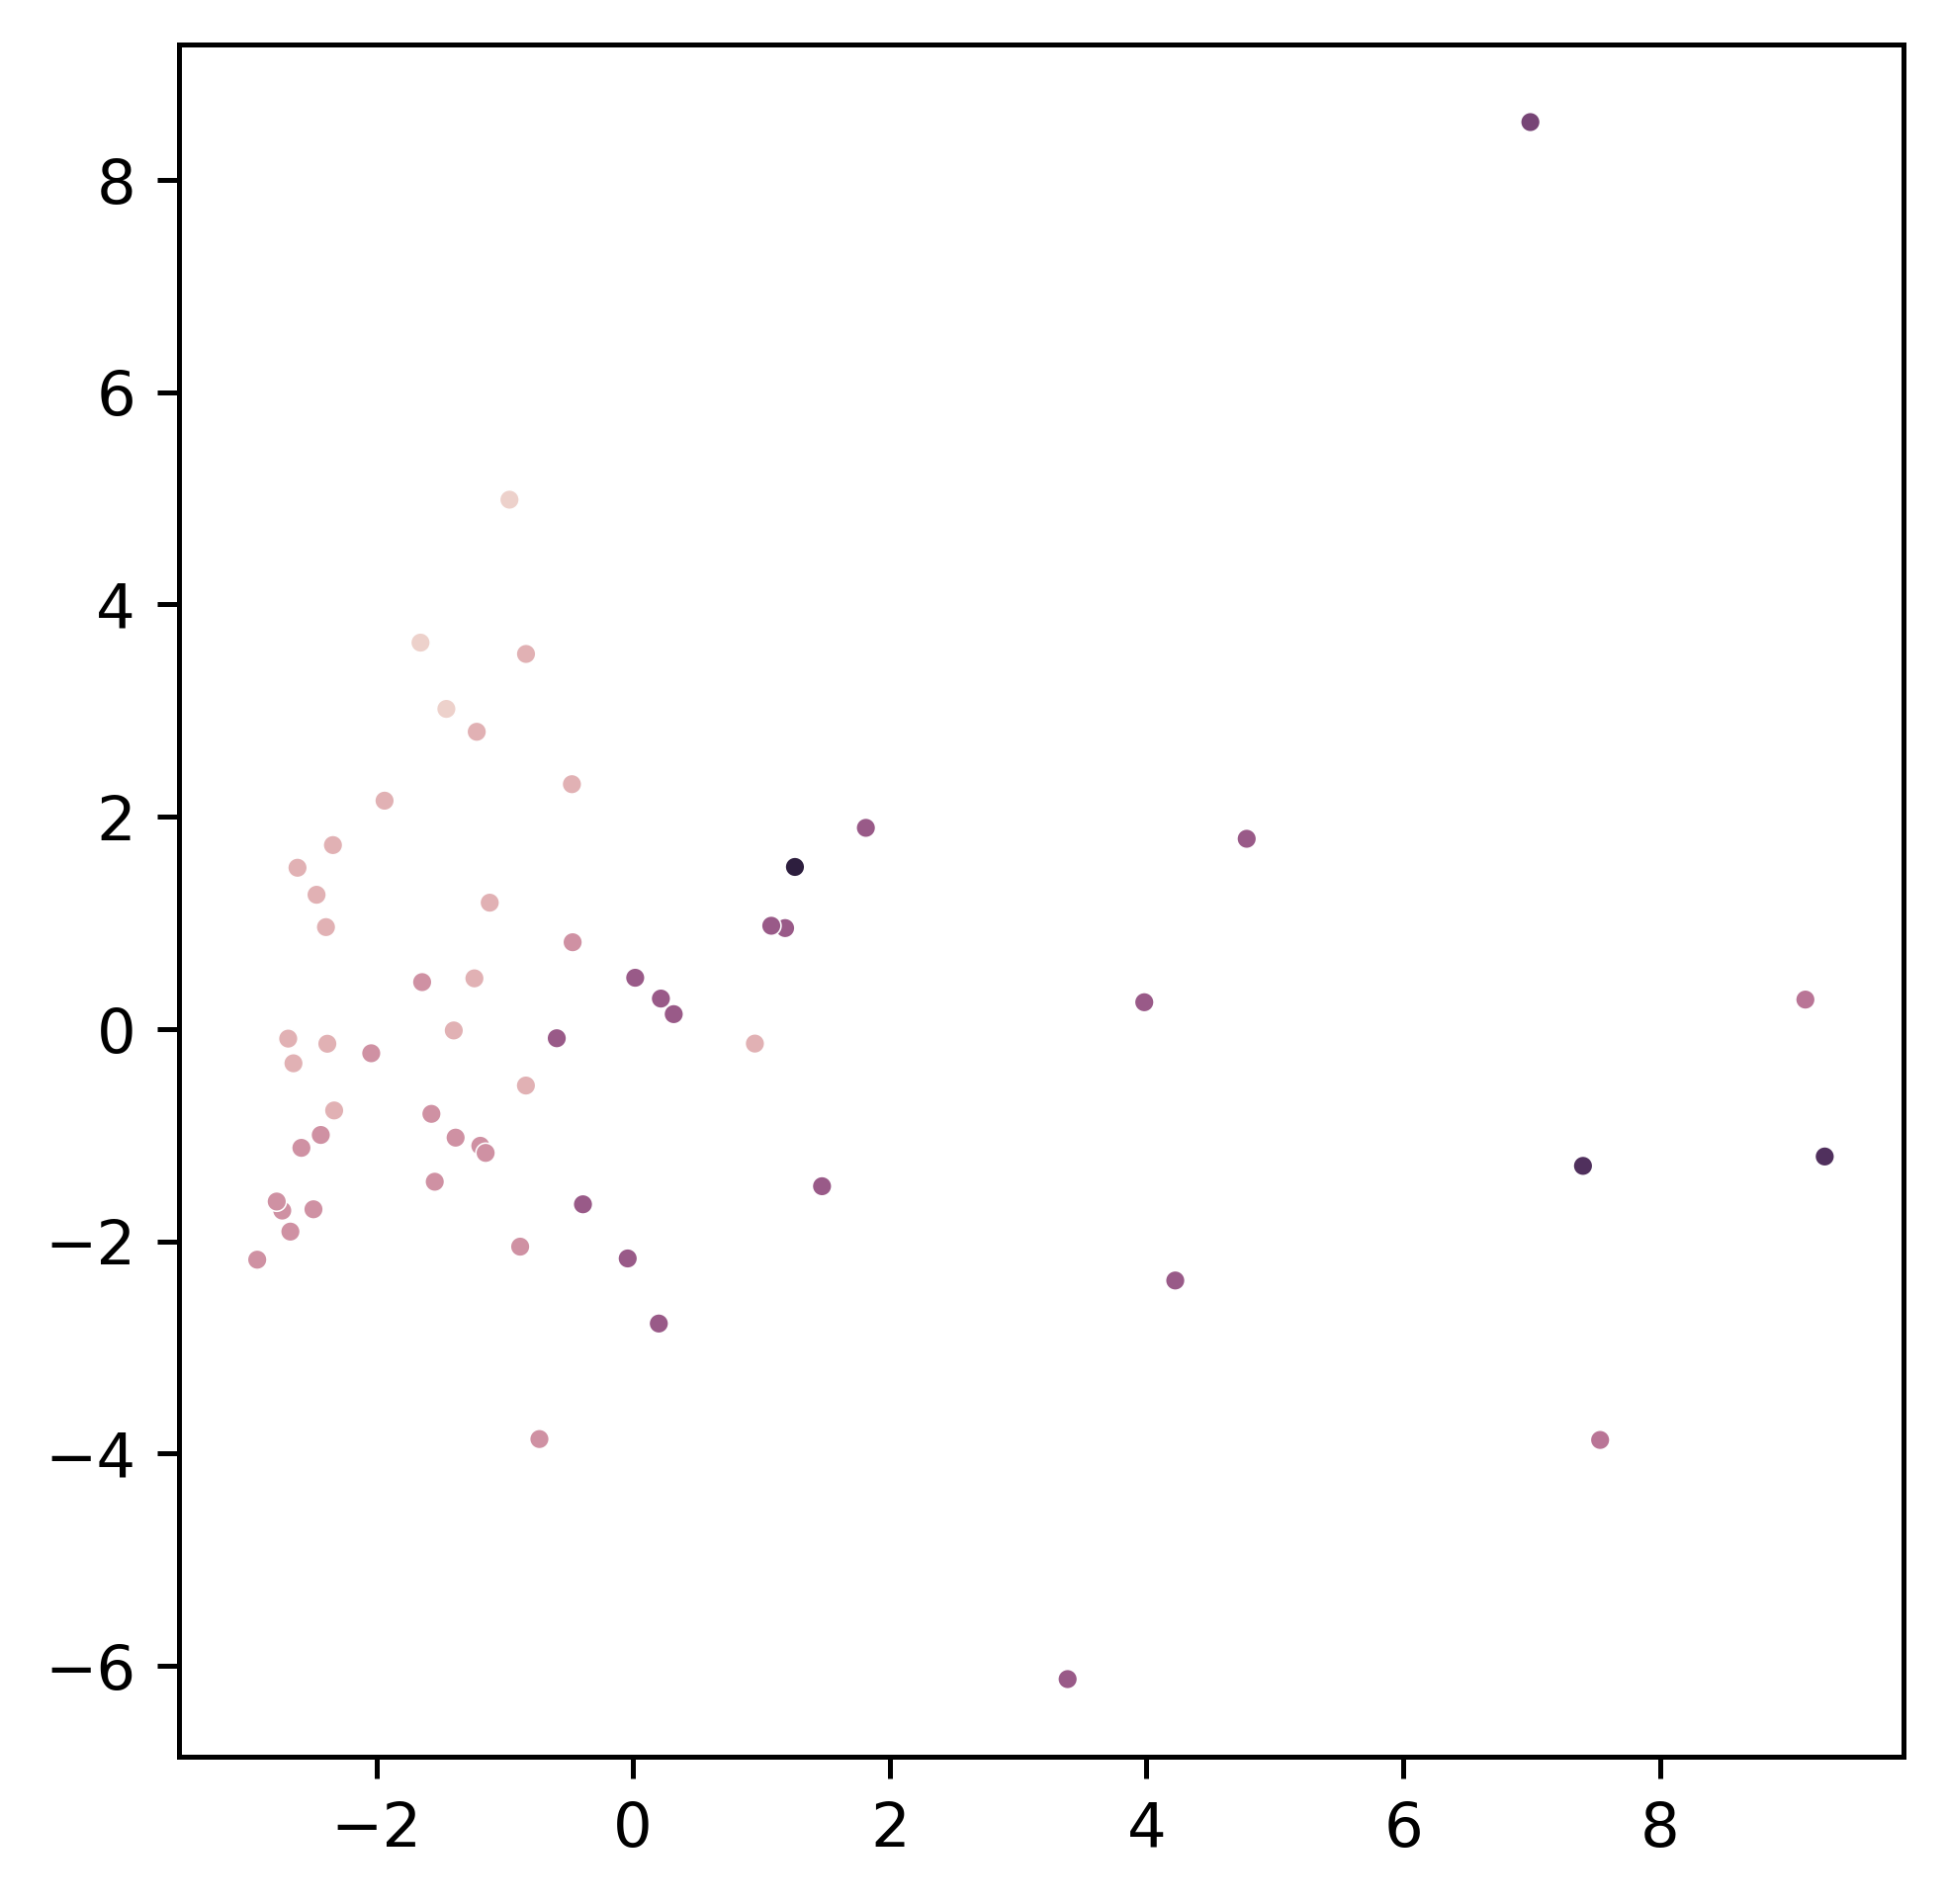

In [85]:
fig, axs = plt.subplots(figsize=(5, 5), dpi=450)

sns.scatterplot(data=df_PCA, x="PCA_x", y="PCA_y", hue = kmeans.labels_, legend=False, s=10)

axs.set_title("")
axs.set_xlabel("")
axs.set_ylabel("")

plt.show()


## UMAP

Plotting umap on cluster labels generated from kmeans (and MeanShift) clustering didn't really yield anything meaningful.... Decided not to put too much more effort into trying to figure this out.

In [77]:
import umap

fit = umap.UMAP(n_neighbors=2, min_dist=0.5)
umapped = fit.fit_transform(KMeans_DF_scaled)

In [78]:
umap_df = pd.DataFrame({'x':umapped[:,0],'y':umapped[:,1]})

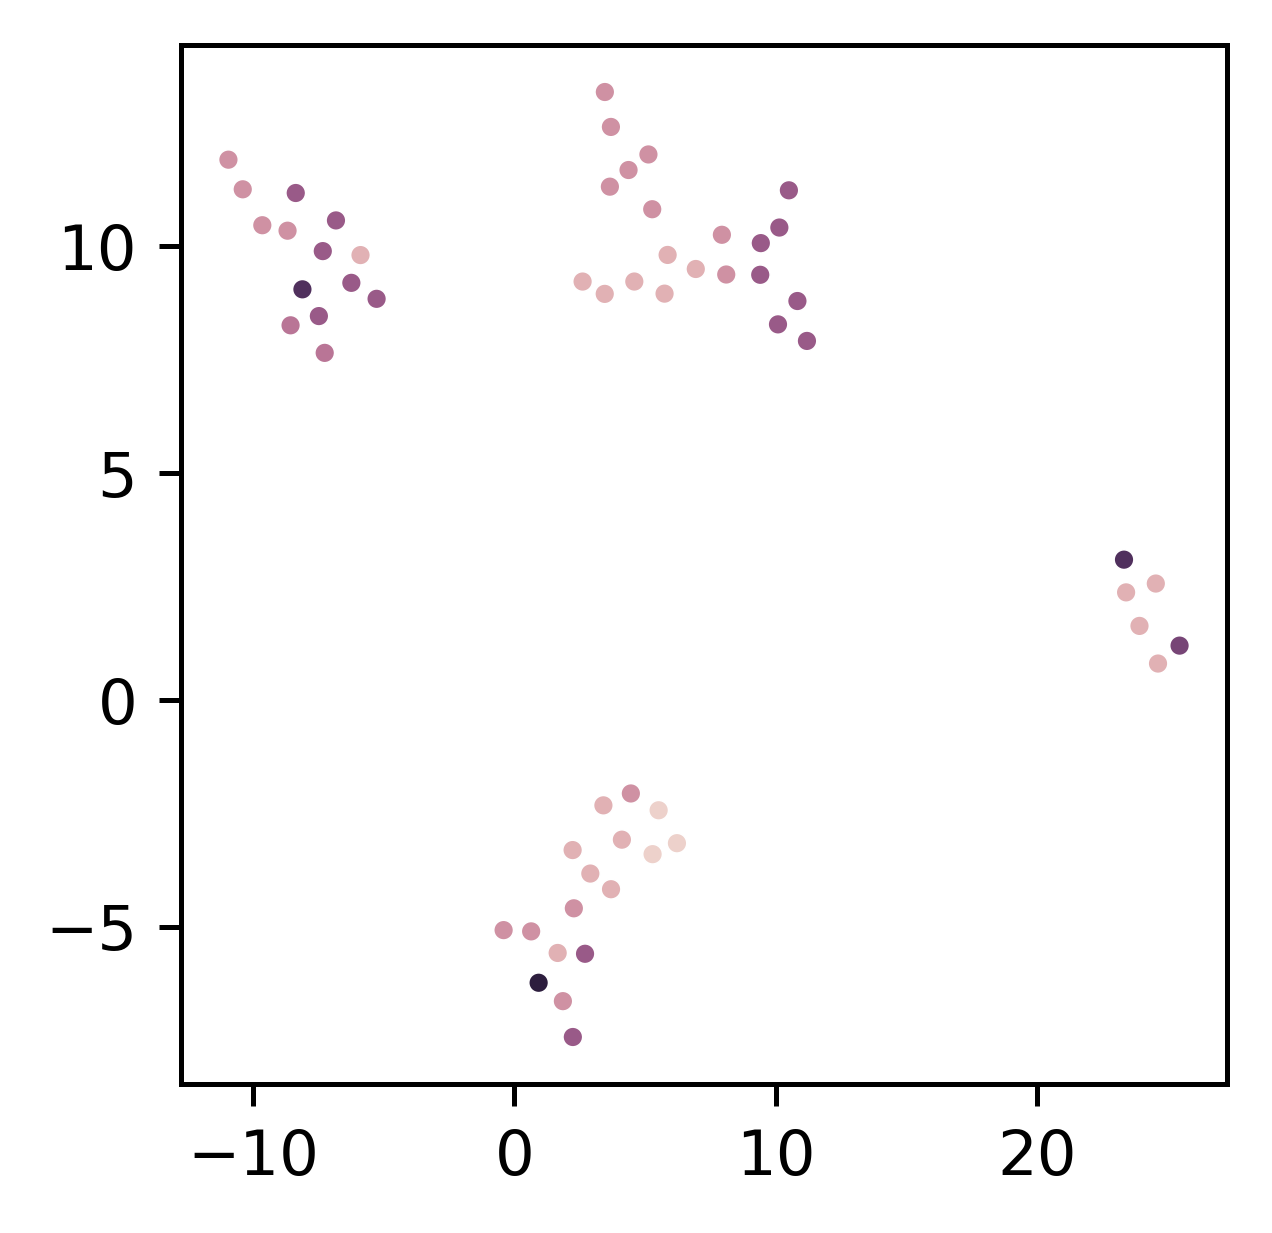

In [156]:
fig, axs = plt.subplots(figsize=(3, 3), dpi=450)

sns.scatterplot(data=umap_df, x="x", y="y", hue=kmeans.labels_, legend=False, s=10)

axs.set_title("")
axs.set_xlabel("")
axs.set_ylabel("")

plt.show()

## u-map enhanced clustering

### Here is the initial embedding UMAP (intended for visualization). Colours of these individual clusters will be determined in later stages

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


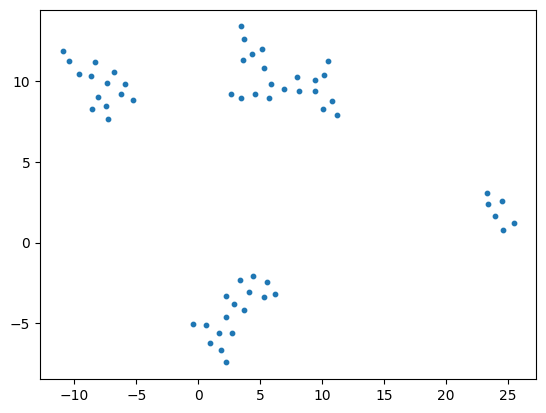

In [153]:
standard_embedding = umap.UMAP(n_neighbors=2, min_dist=1,random_state=1).fit_transform(KMeans_DF_scaled)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=10)

### We are generating another umap embedding - this time to enhance our clusters using HDBSCAN (in this case HDBSCAN is used simply because in the example HDBSCAN is the one that is used (and from what I understand HDBSCAN tends to prioritize reducing false-positives (so it is highly stringent almost to a fault), but I recon other algorithms can be used as well)

In [88]:
clusterable_embedding = umap.UMAP(
    n_neighbors=2,
    min_dist=0.0,
    n_components=2,
    random_state=1,
).fit_transform(KMeans_DF_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_52338/2018993121.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=10, cmap='Spectral')


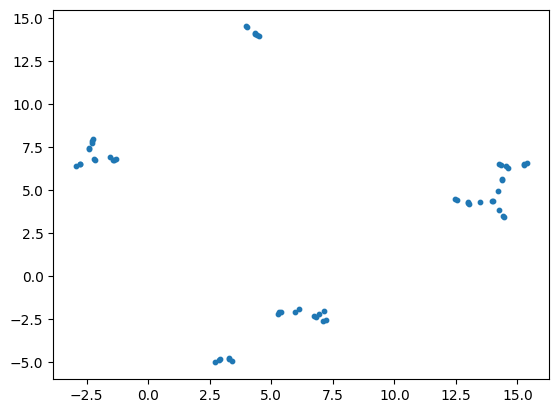

In [92]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=10)

### Here employing HDBSCAN cllustering to generate cluster labels

In [97]:
import hdbscan

labels = hdbscan.HDBSCAN().fit_predict(clusterable_embedding)
labels

array([2, 0, 1, 2, 3, 2, 3, 4, 3, 4, 4, 2, 1, 1, 3, 4, 2, 2, 2, 2, 1, 2,
       1, 3, 0, 2, 1, 2, 1, 1, 2, 2, 0, 3, 2, 4, 3, 2, 1, 2, 3, 2, 1, 3,
       2, 0, 1, 1, 3, 3, 4, 2, 2, 1, 0, 0, 1, 2])

In [152]:
umap_df = pd.DataFrame({'x':standard_embedding[:, 0],'y':standard_embedding[:, 1]})
umap_df['Gene'] = KMeans_genes

## Final Plotting of the clusters

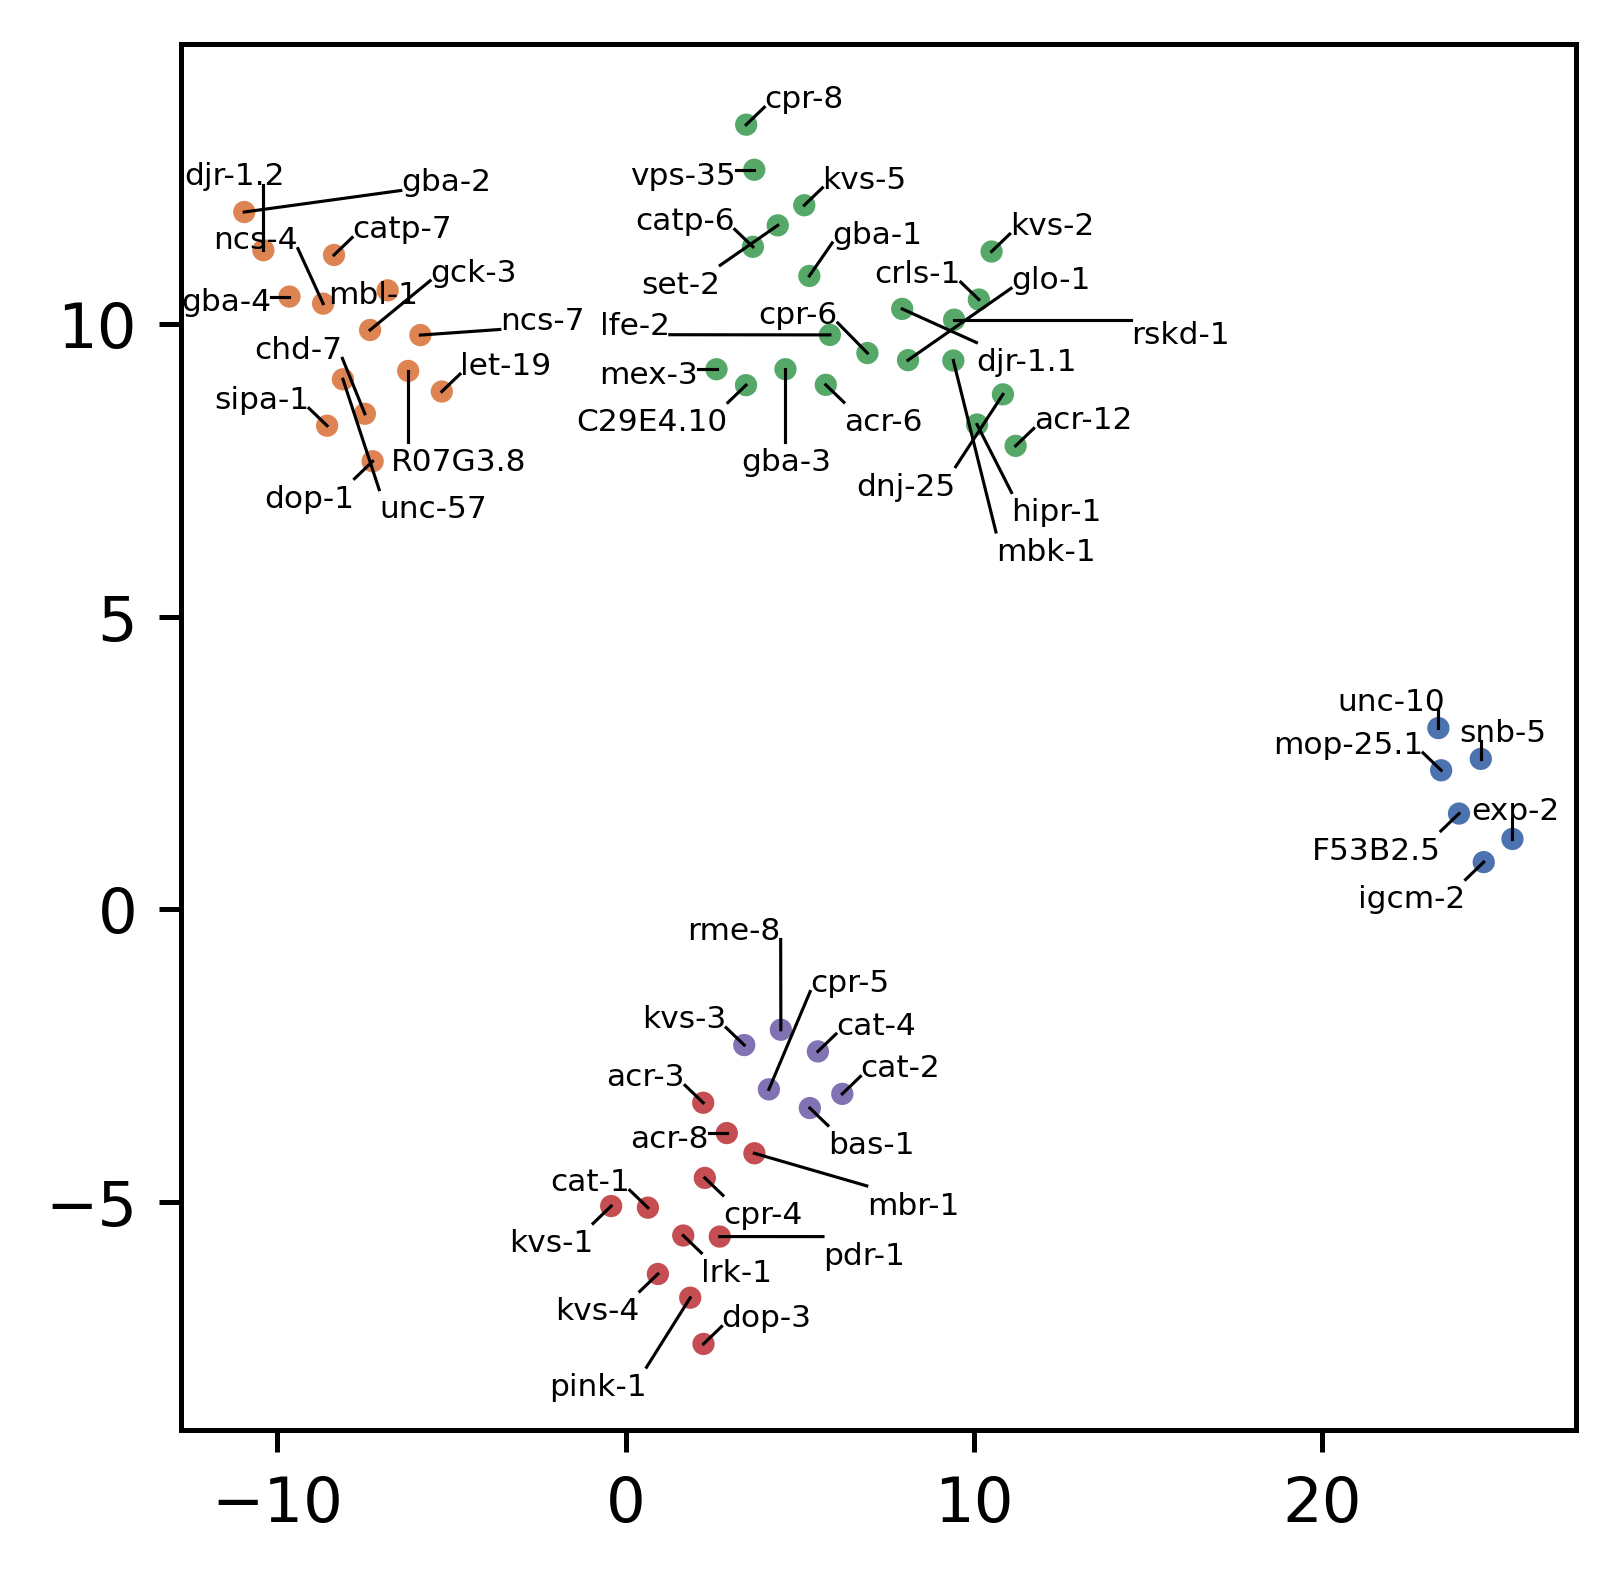

In [151]:
import textalloc as ta
fig, axs = plt.subplots(figsize=(4, 4), dpi=450)

sns.scatterplot(data=umap_df, x="x", y="y", hue=labels, legend=False, palette = 'deep', s=15)

a = pd.concat({'x': umap_df.x, 'y': umap_df.y, 'val': umap_df.Gene}, axis=1)

# text_list = [umap_df.Gene[i] for i in a.iterrows()]

ta.allocate(axs,a.x,a.y,
            a.val,
            x_scatter=a.x, y_scatter=a.y,
            textsize=5,textcolor='k', linewidth=0.5,linecolor='k', avoid_label_lines_overlap=True)

axs.set_title("")
axs.set_xlabel("")
axs.set_ylabel("")



plt.savefig('/Users/Joseph/Desktop/ChrisClustering.png', bbox_inches='tight')
plt.show()